# Problem Statement

**In the telecom industry, customers are able to choose from multiple service providers and actively switch
from one operator to another. In this highly competitive market, the telecommunications industry
experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to
acquire a new customer than to retain an existing one, customer retention has now become even more
important than customer acquisition.**

### Steps Followed :-

![title](pipeline.png)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', None)
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score ,plot_roc_curve
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
import xgboost
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("telecom_churn_data.csv")


In [4]:
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
df.nunique()

mobile_number     99999
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3489
aug_vbc_3g        14676
jul_vbc_3g        14162
jun_vbc_3g        13312
sep_vbc_3g         3720
Length: 226, dtype: int64

In [6]:
df["monthly_2g_6"].value_counts()

0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64

In [7]:
data_dic=pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
data_dic

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

#### With data dictionary and info and data
1. Some Columns have only one value which can be dropped
2. We can see some columns are date columns but considered as object
3. There are some columns which have less unique value (<=20) we can treat them as ordinal categorical values

In [9]:
# Converting date columns data-type to date 
df["last_date_of_month_6"]=pd.to_datetime(df["last_date_of_month_6"])
df["last_date_of_month_7"]=pd.to_datetime(df["last_date_of_month_7"])
df["last_date_of_month_8"]=pd.to_datetime(df["last_date_of_month_8"])
df["last_date_of_month_9"]=pd.to_datetime(df["last_date_of_month_9"])


# date_of_last_rech_data_6 


df["date_of_last_rech_data_6"]=pd.to_datetime(df["date_of_last_rech_data_6"])
df["date_of_last_rech_data_7"]=pd.to_datetime(df["date_of_last_rech_data_7"])
df["date_of_last_rech_data_8"]=pd.to_datetime(df["date_of_last_rech_data_8"])
df["date_of_last_rech_data_9"]=pd.to_datetime(df["date_of_last_rech_data_9"])

### Checking Null value

In [10]:
df.isnull().sum()/len(df)*100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [11]:
# We have so many columns we will fetch out only those columns which have null value
# Taking out only columns  with null value
col_null=[col for col in df.columns if df[col].isnull().any()]

In [12]:
len(col_null)

166

In [13]:
col_null

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',

out of 266 columns 166 have null value

**With the help of data dictionary we will try to find out columns which have meaningful null**

i.e If there is column with number of recaharge NaN which mean no recharge is done


In [14]:
df_null=df[col_null]

In [15]:
df_null.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,2014-07-31,2014-08-31,2014-09-30,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,6/21/2014,7/16/2014,8/8/2014,9/28/2014,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,0.0,0.0,0.0,2014-07-31,2014-08-31,2014-09-30,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,6/29/201

In [16]:
data_dic

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [17]:

# let's start with high value null
df["fb_user_6"].value_counts(dropna=False)

NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

COnclusion:- We will treat NaN as 0 and impute 0

In [18]:
df["fb_user_6"]=df["fb_user_6"].fillna(0)
df["fb_user_7"]=df["fb_user_7"].fillna(0)
df["fb_user_8"]=df["fb_user_8"].fillna(0)
df["fb_user_9"]=df["fb_user_9"].fillna(0)

In [19]:
df["night_pck_user_6"].value_counts(dropna=False)

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

Coclusuon:- We will impute 0 in them  In all coulumns with acronym night_pck_user(6,7,8,9) month

In [20]:
df["night_pck_user_6"]=df["night_pck_user_6"].fillna(0)
df["night_pck_user_7"]=df["night_pck_user_7"].fillna(0)
df["night_pck_user_8"]=df["night_pck_user_8"].fillna(0)
df["night_pck_user_9"]=df["night_pck_user_9"].fillna(0)

In [21]:
df["arpu_3g_6"].value_counts(dropna=False)

NaN       74846
0.00      10930
212.17      667
0.01        439
122.07      418
          ...  
216.30        1
373.66        1
104.52        1
380.23        1
47.28         1
Name: arpu_3g_6, Length: 7419, dtype: int64

Conclsion:-
We can drop arpu_3g_* columns they have high null value

In [22]:
df["arpu_2g_6"].value_counts(dropna=False)

NaN        74846
0.00        6655
212.17      1239
122.07       554
63.96        405
           ...  
128.86         1
456.17         1
168.74         1
421.06         1
1382.97        1
Name: arpu_2g_6, Length: 6991, dtype: int64

Conclsion:-
We can drop arpu_2g_* columns they have high null value

We can drop these columns even if we treat NaN as 0, We will end up creating highly skewed Columns as alreay 0 is present in columns and adding 0 will create skweeness


In [23]:
df=df.drop(["arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9"],1)
df=df.drop(["arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"],1)

In [24]:
df["count_rech_3g_6"].value_counts(dropna=False)

NaN     74846
0.0     15788
1.0      6742
2.0      1541
3.0       514
4.0       203
5.0       120
7.0        58
6.0        56
8.0        31
9.0        23
10.0       20
11.0       15
12.0        6
15.0        6
19.0        5
13.0        4
22.0        3
23.0        3
18.0        3
17.0        3
14.0        3
29.0        2
16.0        2
28.0        1
21.0        1
Name: count_rech_3g_6, dtype: int64

Conclusion:- We will fill 0 in NaN

In [25]:
df["count_rech_3g_6"]=df["count_rech_3g_6"].fillna(0)
df["count_rech_3g_7"]=df["count_rech_3g_7"].fillna(0)
df["count_rech_3g_8"]=df["count_rech_3g_8"].fillna(0)
df["count_rech_3g_9"]=df["count_rech_3g_9"].fillna(0)

In [26]:
df["count_rech_2g_6"].value_counts(dropna=False)

NaN     74846
1.0     10902
0.0      5920
2.0      3240
3.0      1461
4.0       984
5.0       635
6.0       477
7.0       361
8.0       287
9.0       238
10.0      196
11.0      125
12.0      111
13.0       51
14.0       46
15.0       27
17.0       19
16.0       16
18.0       13
19.0       12
20.0        7
22.0        7
21.0        5
25.0        3
24.0        3
28.0        2
34.0        1
30.0        1
32.0        1
39.0        1
42.0        1
Name: count_rech_2g_6, dtype: int64

Conclusion:- We will fill 0 in NaN

In [27]:
df["count_rech_2g_6"]=df["count_rech_2g_6"].fillna(0)
df["count_rech_2g_7"]=df["count_rech_2g_7"].fillna(0)
df["count_rech_2g_8"]=df["count_rech_2g_8"].fillna(0)
df["count_rech_2g_9"]=df["count_rech_2g_9"].fillna(0)

In [28]:
df["max_rech_data_6"].value_counts(dropna=False)

NaN       74846
154.0      4900
25.0       4402
252.0      3144
98.0       1441
198.0      1380
17.0       1274
23.0       1098
145.0      1062
152.0       908
14.0        669
41.0        530
179.0       517
91.0        512
46.0        418
149.0       328
177.0       315
274.0       301
56.0        301
49.0        280
455.0       197
33.0        176
125.0       170
8.0         163
202.0       145
655.0        96
505.0        74
449.0        61
1.0          45
29.0         39
101.0        31
755.0        30
951.0        27
5.0          21
22.0         18
52.0         15
13.0         14
855.0        12
1555.0        9
48.0          6
15.0          5
9.0           5
61.0          4
1255.0        3
295.0         3
1505.0        1
148.0         1
995.0         1
495.0         1
Name: max_rech_data_6, dtype: int64

In [29]:
df["max_rech_data_6"]=df["max_rech_data_6"].fillna(0)
df["max_rech_data_7"]=df["max_rech_data_7"].fillna(0)
df["max_rech_data_8"]=df["max_rech_data_8"].fillna(0)
df["max_rech_data_9"]=df["max_rech_data_9"].fillna(0)

In [30]:
df["total_rech_data_6"].value_counts(dropna=False)

NaN     74846
1.0     13309
2.0      5186
3.0      2065
4.0      1335
5.0       808
6.0       588
7.0       428
8.0       341
9.0       261
10.0      219
11.0      161
12.0      136
14.0       63
13.0       59
15.0       32
17.0       30
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
23.0        4
25.0        4
32.0        3
40.0        3
26.0        3
28.0        3
29.0        2
35.0        2
34.0        1
33.0        1
27.0        1
61.0        1
55.0        1
46.0        1
Name: total_rech_data_6, dtype: int64

Conclusion:- We will use 0 to impute NaN

In [31]:
df["total_rech_data_6"]=df["total_rech_data_6"].fillna(0)
df["total_rech_data_7"]=df["total_rech_data_7"].fillna(0)
df["total_rech_data_8"]=df["total_rech_data_8"].fillna(0)
df["total_rech_data_9"]=df["total_rech_data_9"].fillna(0)

av_rech_amt_data_ is dependent on count_rech_2g or count_rech_3g <br>
if there is 0 in count_rech_2g or count_rech_3g then we can impute 0 in av_rech_amt_data_ also but <br>
if there is any value in count_rech_2g or count_rech_3g then we cannot impute 0 in av_rech_amt_data_

In [32]:
df["av_rech_amt_data_6"]=np.where((df["count_rech_2g_6"]==0) & (df["count_rech_3g_6"]==0), df["av_rech_amt_data_6"].ffill(),0)
df["av_rech_amt_data_7"]=np.where((df["count_rech_2g_7"]==0) & (df["count_rech_3g_7"]==0), df["av_rech_amt_data_7"].ffill(),0)
df["av_rech_amt_data_8"]=np.where((df["count_rech_2g_8"]==0) & (df["count_rech_3g_8"]==0), df["av_rech_amt_data_8"].ffill(),0)
df["av_rech_amt_data_9"]=np.where((df["count_rech_2g_9"]==0) & (df["count_rech_3g_9"]==0), df["av_rech_amt_data_9"].ffill(),0)

In [33]:
df["date_of_last_rech_data_6"].value_counts(dropna=False)

NaT           74846
2014-06-30     1888
2014-06-29     1651
2014-06-28     1643
2014-06-26     1384
2014-06-27     1333
2014-06-25     1108
2014-06-24     1067
2014-06-22      903
2014-06-23      893
2014-06-21      861
2014-06-17      859
2014-06-19      813
2014-06-20      779
2014-06-18      773
2014-06-14      739
2014-06-16      731
2014-06-12      660
2014-06-15      656
2014-06-13      631
2014-06-11      629
2014-06-10      626
2014-06-09      607
2014-06-06      591
2014-06-05      584
2014-06-07      517
2014-06-08      514
2014-06-03      495
2014-06-04      464
2014-06-02      423
2014-06-01      331
Name: date_of_last_rech_data_6, dtype: int64

We can drop these columns as they have so many null value 

In [34]:
df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"],1,inplace=True)

### We have treated all the columns which have high value null 

### We can See less then 10 % null value in all columns, now we will use KNN imputer to impute

In [35]:
# dropping those columns which have only one value
col_with1val=[col for col in df.columns if df[col].nunique()==1]

col_with1val

# df=df.drop(col_with1val,1)

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [36]:
# We can drop columns circleid, last_date_of_month_* 
# for other we will do analysis
df.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],1,inplace=True)

In [37]:
col_with1val=[col for col in df.columns if df[col].nunique()==1]

df[col_with1val].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
count,98981.0,98981.0,98981.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# we can drop these columns also as they contain only 0 and 
df.drop(col_with1val,1,inplace=True)

In [39]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72

# Filtering High Value Customer 

In [40]:
# driving  columns for average amount  spent on data this include 
df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_data_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']

In [41]:
df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)


In [42]:
# driving filter criteria 
df_av_rech_6n7 = (df['total_rech_amt_6'] 
+ df['total_rech_amt_7']
+ df['total_rech_data_amt_6'] 
+ df['total_rech_data_amt_7'])/2

percentile_70_6n7 = np.percentile(df_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

70 percentile is :  368.5


In [43]:
df_hvc = df[df_av_rech_6n7 >= percentile_70_6n7]

print("Dimensions of the filtered dataset:",df_hvc.shape)

Dimensions of the filtered dataset: (30011, 194)


# Now we will impute  remaining null value 


In [44]:
# We have so many columns we will fetch out only those columns which have null value
# Taking out only columns  with null value
col_null=[col for col in df_hvc.columns if df_hvc[col].isnull().any()]

len(col_null)


112

In [45]:
# we have still 127 columns with null value
df_hvc[col_null].isnull().sum()/len(df_hvc[col_null])*100

onnet_mou_6            1.052947
onnet_mou_7            1.009630
onnet_mou_8            3.125521
onnet_mou_9            5.677918
offnet_mou_6           1.052947
                         ...   
ic_others_9            5.677918
date_of_last_rech_6    0.206591
date_of_last_rech_7    0.379861
date_of_last_rech_8    1.979274
date_of_last_rech_9    2.885609
Length: 112, dtype: float64

In [46]:
# Before that we will take a quick look of descriptive statstics and distrbution of data, We don't want imputer to change original distributipn 
df_hvc[col_null].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000,29695.000000,29708.000000,29073.000000,28307.000000
mean,299.184718,307.447285,276.234168,255.228092,422.380819,428.248096,387.121245,357.382243,17.598062,13.660030,13.683965,12.084915,29.633675,22.260754,22.161948,18.274026,95.688242,96.706103,89.951446,85.616486,183.208674,183.120362,172.998297,166.955965,7.053601,7.169655,6.703844,6.682036,1.583837,1.881222,1.767998,1.509848,285.959416,287.005181,269.662288,259.262995,191.772393,201.916113,177.752086,162.233725,205.259036,215.588560,185.362328,165.290383,2.032163,2.054989,1.847471,1.773102,399.067969,419.564032,364.965911,329.301082,2.288522,2.229914,2.094787,1.873297,5.979323,7.501222,7.107334,5.998859,0.699876,0.048085,0.061039,0.094263,69.480649,71.028476,68.064333,65.976302,161.312344,162.453208,158.585128,152.725102,15.761590,16.678413,15.180997,15.779242,246.564535,250.170194,241.840347,234.490525,16.402055,17.066026,15.537177,14.835691,32.355853,33.818592,31.416700,28.816927,2.905095,3.023474,2.767422,2.886250,51.667018,53.912174,49.725160,46.542619,0.067441

In [47]:
col_num=[col for col in df.columns if df[col].dtypes=="float" or df[col].dtypes=="int"]

In [48]:
col_num

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

In [ ]:
%%time
imputer = KNN()
df_hvc_impute[col_num] = imputer.fit_transform(df_hvc_impute[col_num])
df_hvc_impute.head()

In [49]:
df_hvc_impute=pd.read_csv("telecom_filtered.csv")

In [50]:

df_hvc_impute.head()

,Unnamed: 0,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0,197.385,214.816,213.803,21.100,11.558176,13.003691,0.00,7.527038,9.324429,6.581077,0.00,7.646312,0.00,0.00,0.00,5.716648,0.274383,0.051228,0.00,4.942182,11.558176,13.003691,0.00,4.250332,6.945131,5.303791,0.00,5.756747,0.499747,0.899907,0.00,0.111017,0.838098,0.322105,0.00,0.00,19.005625,19.214924,0.00,10.119659,0.00,0.00,0.00,0.024944,0.762387,0.00,0.00,0.000000,0.00,0.00,0.00,0.00000,0.762387,0.00,0.00,0.024944,0.130854,0.00,0.00,0.000000,0.838098,0.322105,0.00,0.086565,1.605764,0.0,0.0,0.000000,0.00,0.00,0.00,0.00,6.170996,6.790424,0.16,2.153612,15.888835,9.815991,4.13,5.032763,0.879402,0.051599,1.15,0.000000,22.945204,16.663066,5.44,7.188945,0.00,0.00,0.00,0.000000,0.096631,0.00,0.00,0.00000,0.081915,0.00,0.00,0.000000,0.178545,0.00,0.00,0.000000,0.00,0.00,5.44,0.00,0.00,0.024944,0.0,0.255701,0.00,0.744862,0.00,0.126595,0.028145,0.00,0.00,0.235519,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,1
1,7,1069.180,

In [51]:
df_hvc_impute.shape

(30001, 195)

In [52]:
df_hvc_impute.isnull().sum()/len(df_hvc_impute)

Unnamed: 0    0.0
arpu_6        0.0
arpu_7        0.0
arpu_8        0.0
arpu_9        0.0
             ... 
aug_vbc_3g    0.0
jul_vbc_3g    0.0
jun_vbc_3g    0.0
sep_vbc_3g    0.0
churn         0.0
Length: 195, dtype: float64

 we can see that No null found

### Driving  Target columns with the help of 9 month data 
 We will use 
#### total_ic_mou_9
#### total_og_mou_9
#### vol_2g_mb_9
#### vol_3g_mb_9

 if  Incoming and outgoing in month 9 and data usage in both 2g and 3g is 0 then we will  consider them as churned and otherwise not churned

In [53]:
# Calculating the total incoming and outgoing minutes of usage
df_hvc_impute['total_calls_mou_9'] = df_hvc_impute.total_ic_mou_9 + df_hvc_impute.total_og_mou_9

# Calculating 2g and 3g data used in the month of September
df_hvc_impute['total_internet_mb_9'] =  df_hvc_impute.vol_2g_mb_9 + df_hvc_impute.vol_3g_mb_9

# #### Creating churn variable:
# - Those who have not used either calls or internet in the month of 9 these customers who have churned

#     - 0 - No churn
#     - 1 - churn

df_hvc_impute['churn'] = df_hvc_impute.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)

# Droping derived variables
df_hvc_impute = df_hvc_impute.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [54]:
print("Churn and No Churn Ratio:")
print(round(df_hvc_impute.churn.value_counts()*100/len(df_hvc_impute)))

Churn and No Churn Ratio:
0    92.0
1     8.0
Name: churn, dtype: float64


In [55]:
# dropping all columns of month 9
col_w_9mnth =  df_hvc_impute.columns[df_hvc_impute.columns.str.contains('9')]
print(col_w_9mnth)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'],
      dtype='object')


In [56]:
df_hvc_impute.drop("Unnamed: 0",1,inplace=True)

In [57]:
df_hvc_impute.drop(col_w_9mnth,1,inplace=True)

In [58]:
print(df_hvc_impute.shape)
df_hvc_impute.head()

(30001, 147)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,11.558176,13.003691,0.00,9.324429,6.581077,0.00,0.00,0.00,0.00,0.274383,0.051228,0.00,11.558176,13.003691,0.00,6.945131,5.303791,0.00,0.499747,0.899907,0.00,0.838098,0.322105,0.00,19.005625,19.214924,0.00,0.00,0.00,0.00,0.762387,0.00,0.00,0.00,0.00,0.00,0.762387,0.00,0.00,0.130854,0.00,0.00,0.838098,0.322105,0.00,1.605764,0.0,0.0,0.00,0.00,0.00,6.170996,6.790424,0.16,15.888835,9.815991,4.13,0.879402,0.051599,1.15,22.945204,16.663066,5.44,0.00,0.00,0.00,0.096631,0.00,0.00,0.081915,0.00,0.00,0.178545,0.00,0.00,0.00,0.00,5.44,0.00,0.024944,0.0,0.00,0.744862,0.00,0.028145,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.23,33.49,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.30,23.29,12.01,49.890000,31.76,49.14,6.66,20.08,16.68,60.860000,75.14,77.84,0.000000,0.18,10.01,4.500000,0.000000,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.89,11.83,30.39,91.440000,126.99,141.33,52.190000,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.000000,0.0,2.06,14.530000,31.59,15.740000,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1
2,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000,80.630000,136.48,0.00,0.00,0.00,0.000000,0.000000,0.

### Derived Features

In [59]:
# We can derive some new features
# driving  columns for average amount  spent on data this include 
df_hvc_impute['total_rech_data_amt_6'] = df_hvc_impute['av_rech_amt_data_6'] * df_hvc_impute['total_rech_data_6']
df_hvc_impute['total_rech_data_amt_7'] = df_hvc_impute['av_rech_amt_data_7'] * df_hvc_impute['total_rech_data_7']
df_hvc_impute['total_rech_data_amt_8'] = df_hvc_impute['av_rech_amt_data_8'] * df_hvc_impute['total_rech_data_8']

# Total 3g and 2g in mb use 
df_hvc_impute['total_vol_mb_6'] = df_hvc_impute['vol_2g_mb_6'] + df_hvc_impute['vol_3g_mb_6']
df_hvc_impute['total_vol_mb_7'] = df_hvc_impute['vol_2g_mb_7'] + df_hvc_impute['vol_3g_mb_7']
df_hvc_impute['total_vol_mb_8'] = df_hvc_impute['vol_2g_mb_8'] + df_hvc_impute['vol_3g_mb_6']



# EDA and Outlier treatment

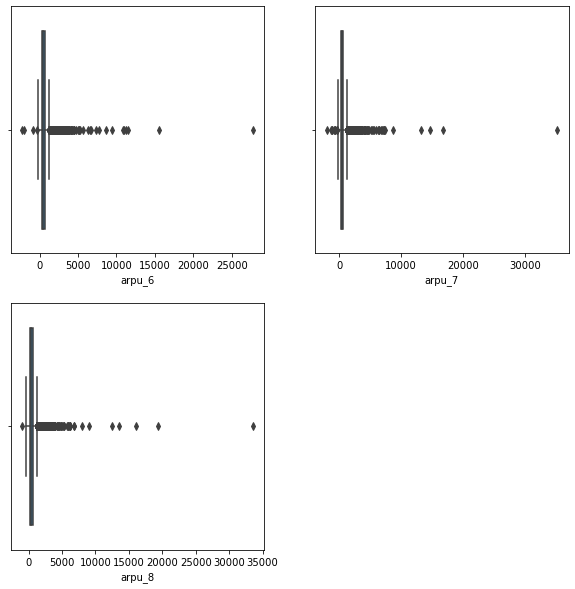

In [60]:
# Outlier treatment of Average r p u

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

sns.boxplot(df_hvc_impute["arpu_6"])

plt.subplot(2,2,2)
sns.boxplot(df_hvc_impute["arpu_7"])


plt.subplot(2,2,3)
sns.boxplot(df_hvc_impute["arpu_8"])

plt.show()

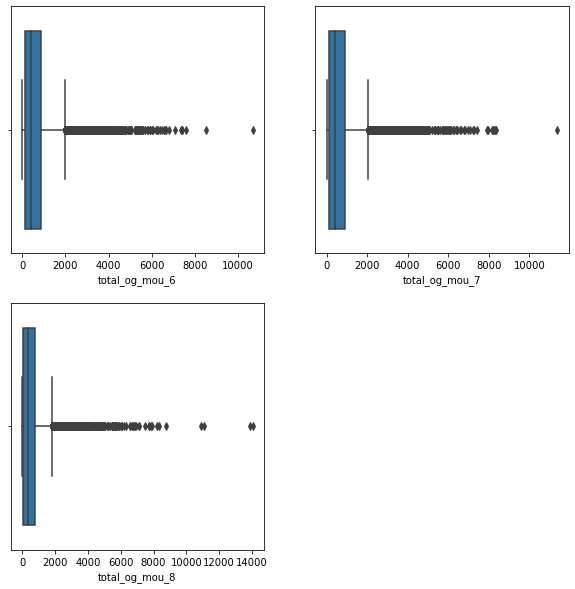

In [61]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

sns.boxplot(df_hvc_impute["total_og_mou_6"])

plt.subplot(2,2,2)
sns.boxplot(df_hvc_impute["total_og_mou_7"])


plt.subplot(2,2,3)
sns.boxplot(df_hvc_impute["total_og_mou_8"])

plt.show()

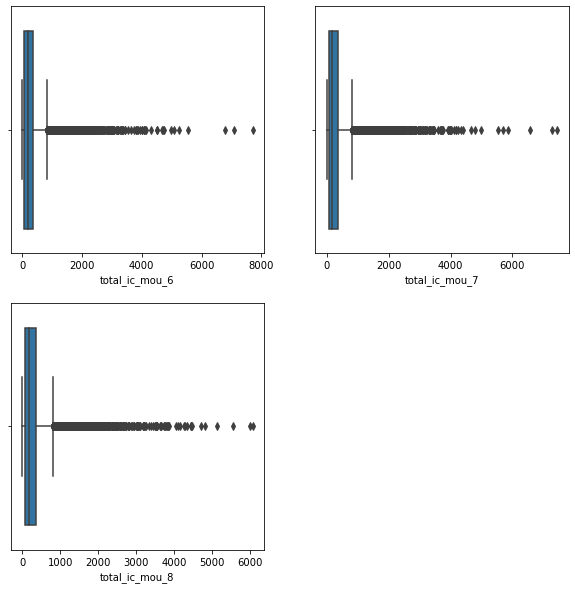

In [62]:

# total_ic_mou_6

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

sns.boxplot(df_hvc_impute["total_ic_mou_6"])

plt.subplot(2,2,2)
sns.boxplot(df_hvc_impute["total_ic_mou_7"])


plt.subplot(2,2,3)
sns.boxplot(df_hvc_impute["total_ic_mou_8"])

plt.show()

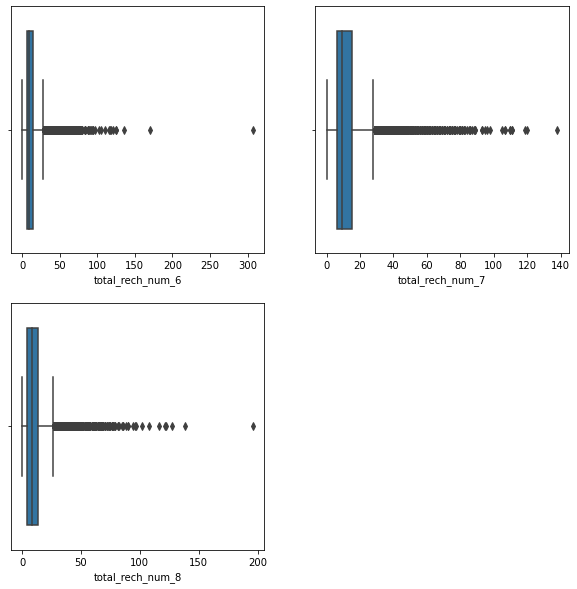

In [63]:
# total_rech_num_6


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

sns.boxplot(df_hvc_impute["total_rech_num_6"])

plt.subplot(2,2,2)
sns.boxplot(df_hvc_impute["total_rech_num_7"])


plt.subplot(2,2,3)
sns.boxplot(df_hvc_impute["total_rech_num_8"])

plt.show()

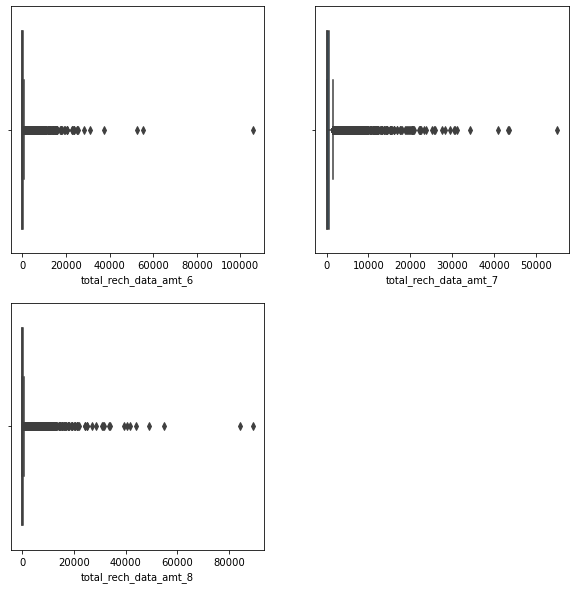

In [64]:
# total_rech_data_amt_6

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

sns.boxplot(df_hvc_impute["total_rech_data_amt_6"])

plt.subplot(2,2,2)
sns.boxplot(df_hvc_impute["total_rech_data_amt_7"])


plt.subplot(2,2,3)
sns.boxplot(df_hvc_impute["total_rech_data_amt_8"])

plt.show()

We can see some outliers in columns
For now we will go with data without doing anythingd,but during model building we will use power transformation

### We will do EDA in recharge amount, net usage outgoing call, incomoing call, average revenue etc

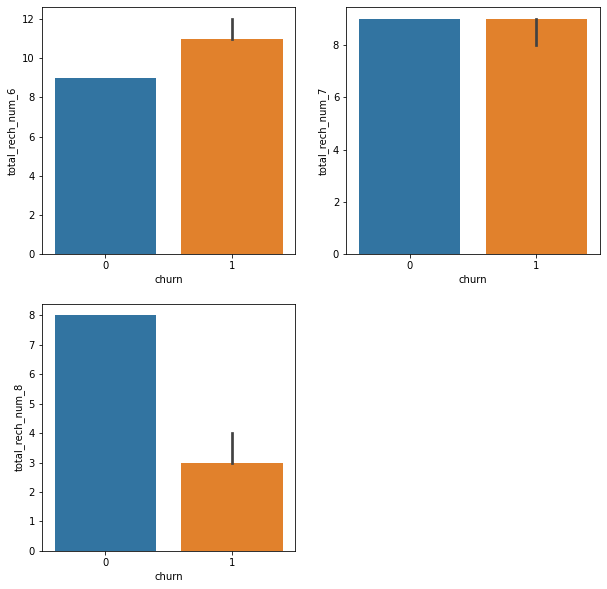

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(y="total_rech_num_6",x="churn",data=df_hvc_impute,estimator=np.median)

plt.subplot(2,2,2)

sns.barplot(y="total_rech_num_7",x="churn",data=df_hvc_impute,estimator=np.median)


plt.subplot(2,2,3)

sns.barplot(y="total_rech_num_8",x="churn",data=df_hvc_impute,estimator=np.median)


plt.show()

**we can see that number of recharge gond down in to 2-3 from 8-9 in month of 8 this can be good indicator for customer who are going to churn**

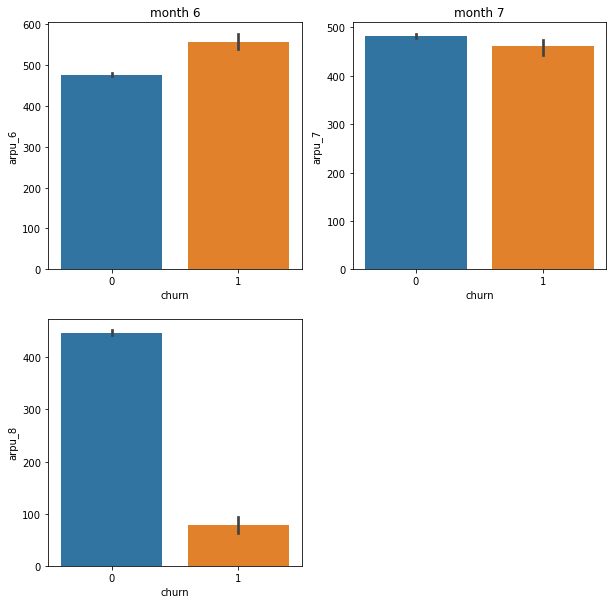

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(y="arpu_6",x="churn",data=df_hvc_impute,estimator=np.median)
plt.title("month 6")

plt.subplot(2,2,2)

sns.barplot(y="arpu_7",x="churn",data=df_hvc_impute,estimator=np.median)
plt.title("month 7")


plt.subplot(2,2,3)

sns.barplot(y="arpu_8",x="churn",data=df_hvc_impute,estimator=np.median)


plt.show()

**IF we consider 6 and 7 month as a good phase we can see average per revenue is significantly dropped in for person who churned**

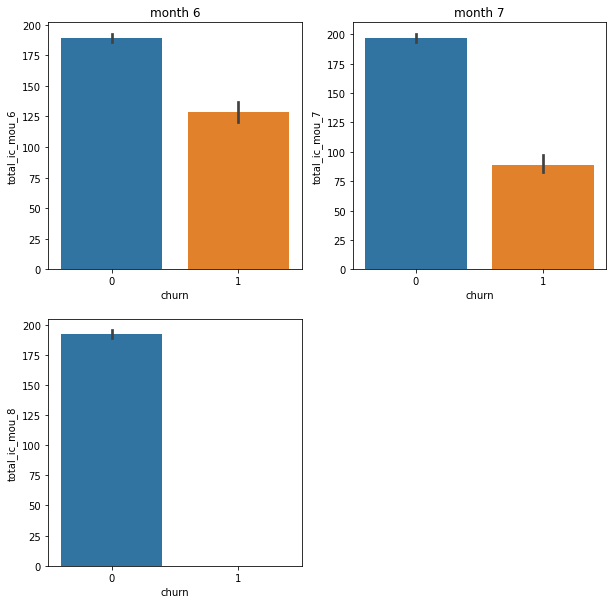

In [67]:
# df_hvc_impute["total_rech_data_amt_7"].dtypes

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(y="total_ic_mou_6",x="churn",data=df_hvc_impute,estimator=np.median)
plt.title("month 6")

plt.subplot(2,2,2)

sns.barplot(y="total_ic_mou_7",x="churn",data=df_hvc_impute,estimator=np.median)
plt.title("month 7")


plt.subplot(2,2,3)

sns.barplot(y="total_ic_mou_8",x="churn",data=df_hvc_impute,estimator=np.median)


plt.show()



We can see Significantly drop in Incoming call in person who churned in month 8 

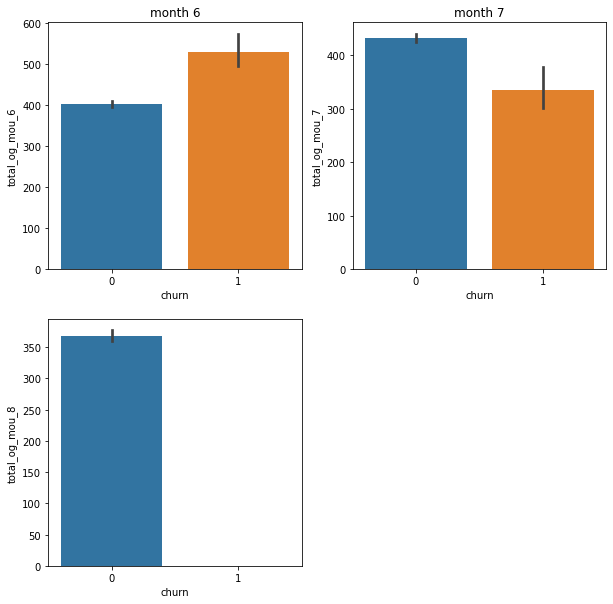

In [68]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(y="total_og_mou_6",x="churn",data=df_hvc_impute,estimator=np.median)
plt.title("month 6")

plt.subplot(2,2,2)

sns.barplot(y="total_og_mou_7",x="churn",data=df_hvc_impute,estimator=np.median)
plt.title("month 7")


plt.subplot(2,2,3)

sns.barplot(y="total_og_mou_8",x="churn",data=df_hvc_impute,estimator=np.median)


plt.show()


We can see significantly drop in action period in outgoing also 

with y

In [69]:
df_hvc_impute.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8
0,197.385,214.816,213.803,11.558176,13.003691,0.00,9.324429,6.581077,0.00,0.00,0.00,0.00,0.274383,0.051228,0.00,11.558176,13.003691,0.00,6.945131,5.303791,0.00,0.499747,0.899907,0.00,0.838098,0.322105,0.00,19.005625,19.214924,0.00,0.00,0.00,0.00,0.762387,0.00,0.00,0.00,0.00,0.00,0.762387,0.00,0.00,0.130854,0.00,0.00,0.838098,0.322105,0.00,1.605764,0.0,0.0,0.00,0.00,0.00,6.170996,6.790424,0.16,15.888835,9.815991,4.13,0.879402,0.051599,1.15,22.945204,16.663066,5.44,0.00,0.00,0.00,0.096631,0.00,0.00,0.081915,0.00,0.00,0.178545,0.00,0.00,0.00,0.00,5.44,0.00,0.024944,0.0,0.00,0.744862,0.00,0.028145,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,113.7,152.08,89.32
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.23,33.49,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.910000,255.79,4.30,23.29,12.01,49.890000,31.76,49.14,6.66,20.08,16.68,60.860000,75.14,77.84,0.000000,0.18,10.01,4.500000,0.000000,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.89,11.83,30.39,91.440000,126.99,141.33,52.190000,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.000000,0.0,2.06,14.530000,31.59,15.740000,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0

In [70]:
# we will used them as a Categorical features
col_with20val=[col for col in df_hvc_impute.columns if df_hvc_impute[col].nunique()<=20]

col_with20val

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn']

In [71]:
for col in col_with20val:
    print(df_hvc_impute[col].value_counts())
    print("--------------------------------------------")

0.0    29594
1.0      407
Name: night_pck_user_6, dtype: int64
--------------------------------------------
0.0    29626
1.0      375
Name: night_pck_user_7, dtype: int64
--------------------------------------------
0.0    29660
1.0      341
Name: night_pck_user_8, dtype: int64
--------------------------------------------
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64
--------------------------------------------
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64
--------------------------------------------
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64
--------------------------------------------
0     25342
1      3431
2       852
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64
--------------------------------------------
0     25306
1      3294
2      10

In [72]:
df_hvc_impute.shape

(30001, 153)

In [73]:
# we will make 3g and 2g columns as categorical and do one hot coding
col_cat=["monthly_2g_6","monthly_2g_7","monthly_2g_8","monthly_3g_6","monthly_3g_7","monthly_3g_8"]
df_hvc_impute[col_cat]=df_hvc_impute[col_cat].astype('object')

# Dummification

In [74]:
df_hvc_impute=pd.get_dummies(df_hvc_impute,drop_first=True)

In [75]:
df_hvc_impute.shape

(30001, 197)

In [76]:
df_hvc_impute.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_3g_7_16,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_10,monthly_3g_8_16
0,197.385,214.816,213.803,11.558176,13.003691,0.00,9.324429,6.581077,0.00,0.00,0.00,0.00,0.274383,0.051228,0.00,11.558176,13.003691,0.00,6.945131,5.303791,0.00,0.499747,0.899907,0.00,0.838098,0.322105,0.00,19.005625,19.214924,0.00,0.00,0.00,0.00,0.762387,0.00,0.00,0.00,0.00,0.00,0.762387,0.00,0.00,0.130854,0.00,0.00,0.838098,0.322105,0.00,1.605764,0.0,0.0,0.00,0.00,0.00,6.170996,6.790424,0.16,15.888835,9.815991,4.13,0.879402,0.051599,1.15,22.945204,16.663066,5.44,0.00,0.00,0.00,0.096631,0.00,0.00,0.081915,0.00,0.00,0.178545,0.00,0.00,0.00,0.00,5.44,0.00,0.024944,0.0,0.00,0.744862,0.00,0.028145,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,252.0,252.0,252.0,113.7,152.08,89.32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.23,33.49,31.64,23.740000

# Model Building

In [77]:
X=df_hvc_impute.drop("churn",1)
y=df_hvc_impute["churn"]

In [78]:
print(X.shape)
print(y.shape)

(30001, 196)
(30001,)


Using power transformation for gaussian distrbution <br> 
it can help in reducing effect of outliers also

In [79]:
# taking out non-binary columns
col_non_bin=[col for col in X.columns if X[col].nunique()>2]



X[col_non_bin] =pd.DataFrame(power_transform(X[col_non_bin]))

In [80]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_3g_7_16,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_10,monthly_3g_8_16
0,-0.850813,-0.793309,-0.644151,-0.876972,-0.808195,-1.734592,-1.532140,-1.610740,-2.015420,-0.521328,-0.456483,-0.490099,0.084401,-0.272490,-0.487112,-0.314785,-0.262145,-1.560181,-1.134634,-1.249882,-1.751026,-0.206287,0.091548,-0.877431,1.405808,0.560928,-0.577214,-0.932386,-0.948098,-1.800324,-0.994812,-0.988524,-0.946818,-0.951362,-1.201404,-1.151768,-0.424056,-0.414976,-0.407024,-1.113789,-1.288745,-1.244458,2.023626,-0.280738,-0.265609,-0.033107,-0.600328,-0.975687,1.941000,-0.074124,-0.081569,-1.933539,-1.930234,-1.774640,-0.722581,-0.705862,-1.673561,-0.981486,-1.263398,-1.470496,-0.458688,-1.081057,-0.323256,-1.064590,-1.266686,-1.548525,-0.934750,-0.942895,-0.910212,-1.169621,-1.238654,-1.194984,-0.160375,-0.575999,-0.573344,-1.337325,-1.437273,-1.388973,-2.166885,-2.227272,-1.521819,-0.534370,2.724185,-0.328319,-0.511832,0.929437,-0.517819,-0.278774,-0.530388,-0.547511,-1.192507,-1.489788,-1.303150,-0.543630,-0.882684,-0.503924,0.823568,0.789565,0.823752,1.278188,1.251460,1.256380,0.295005,0.225049,0.383968,1.252005,1.243280,1.288254,-0.815799,-0.82982

### Handling imbalance data 
we will use SMOTE to treat imbalance data

In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=100)
X_smote, y_smote = smote.fit_resample(X,y)

In [168]:
X_smote.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_vol_mb_6,total_vol_mb_7,total_vol_mb_8,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_3,monthly_2g_6_4,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_3,monthly_2g_7_4,monthly_2g_7_5,monthly_2g_8_1,monthly_2g_8_2,monthly_2g_8_3,monthly_2g_8_4,monthly_2g_8_5,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_3,monthly_3g_6_4,monthly_3g_6_5,monthly_3g_6_6,monthly_3g_6_7,monthly_3g_6_8,monthly_3g_6_9,monthly_3g_6_11,monthly_3g_6_14,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_3,monthly_3g_7_4,monthly_3g_7_5,monthly_3g_7_6,monthly_3g_7_7,monthly_3g_7_8,monthly_3g_7_9,monthly_3g_7_10,monthly_3g_7_11,monthly_3g_7_12,monthly_3g_7_14,monthly_3g_7_16,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_3,monthly_3g_8_4,monthly_3g_8_5,monthly_3g_8_6,monthly_3g_8_7,monthly_3g_8_8,monthly_3g_8_9,monthly_3g_8_10,monthly_3g_8_16
0,-0.850813,-0.793309,-0.644151,-0.876972,-0.808195,-1.734592,-1.532140,-1.610740,-2.015420,-0.521328,-0.456483,-0.490099,0.084401,-0.272490,-0.487112,-0.314785,-0.262145,-1.560181,-1.134634,-1.249882,-1.751026,-0.206287,0.091548,-0.877431,1.405808,0.560928,-0.577214,-0.932386,-0.948098,-1.800324,-0.994812,-0.988524,-0.946818,-0.951362,-1.201404,-1.151768,-0.424056,-0.414976,-0.407024,-1.113789,-1.288745,-1.244458,2.023626,-0.280738,-0.265609,-0.033107,-0.600328,-0.975687,1.941000,-0.074124,-0.081569,-1.933539,-1.930234,-1.774640,-0.722581,-0.705862,-1.673561,-0.981486,-1.263398,-1.470496,-0.458688,-1.081057,-0.323256,-1.064590,-1.266686,-1.548525,-0.934750,-0.942895,-0.910212,-1.169621,-1.238654,-1.194984,-0.160375,-0.575999,-0.573344,-1.337325,-1.437273,-1.388973,-2.166885,-2.227272,-1.521819,-0.534370,2.724185,-0.328319,-0.511832,0.929437,-0.517819,-0.278774,-0.530388,-0.547511,-1.192507,-1.489788,-1.303150,-0.543630,-0.882684,-0.503924,0.823568,0.789565,0.823752,1.278188,1.251460,1.256380,0.295005,0.225049,0.383968,1.252005,1.243280,1.288254,-0.815799,-0.82982

In [82]:
X_smote.shape

(55120, 196)

In [83]:
y.value_counts(normalize=True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [84]:
y_smote.shape

(55120,)

In [85]:
y_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

**Now our data is balanced**

# Train Test split 
we will use 80 percent as train data and remaing 20 percent

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,train_size=.80,stratify=y_smote,random_state=100)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(44096, 196)
(44096,)
(11024, 196)
(11024,)


# Interpetable Model

We will use Logistic regression for interpetable model <br>
we will select RFE for finding top 2 features

In [88]:
# logreg with class weight for dealing with imbalance data
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False  True False False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False  True False False  True  True  True False False  True
  True  True False False False False False False Fa

In [89]:
x_support=list(zip(X_train.columns,rfe.support_,rfe.ranking_))

x_support

[('arpu_6', False, 167),
 ('arpu_7', False, 38),
 ('arpu_8', False, 114),
 ('onnet_mou_6', False, 79),
 ('onnet_mou_7', False, 64),
 ('onnet_mou_8', False, 80),
 ('offnet_mou_6', False, 132),
 ('offnet_mou_7', False, 70),
 ('offnet_mou_8', False, 113),
 ('roam_ic_mou_6', False, 169),
 ('roam_ic_mou_7', False, 171),
 ('roam_ic_mou_8', False, 146),
 ('roam_og_mou_6', False, 123),
 ('roam_og_mou_7', False, 62),
 ('roam_og_mou_8', False, 35),
 ('loc_og_t2t_mou_6', False, 166),
 ('loc_og_t2t_mou_7', False, 97),
 ('loc_og_t2t_mou_8', False, 81),
 ('loc_og_t2m_mou_6', False, 77),
 ('loc_og_t2m_mou_7', False, 71),
 ('loc_og_t2m_mou_8', False, 116),
 ('loc_og_t2f_mou_6', False, 89),
 ('loc_og_t2f_mou_7', False, 151),
 ('loc_og_t2f_mou_8', False, 117),
 ('loc_og_t2c_mou_6', False, 110),
 ('loc_og_t2c_mou_7', False, 150),
 ('loc_og_t2c_mou_8', False, 139),
 ('loc_og_mou_6', False, 78),
 ('loc_og_mou_7', False, 164),
 ('loc_og_mou_8', False, 131),
 ('std_og_t2t_mou_6', False, 95),
 ('std_og_t2t_mo

In [90]:
f_col = X_train.columns[rfe.support_]

### Using statsmodels to get detail  

In [91]:
X_train_sm = sm.add_constant(X_train[f_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44075
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17043.
Date:                Sat, 28 Nov 2020   Deviance:                       34086.
Time:                        13:16:51   Pearson chi2:                 6.48e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0017      0.046      0.037      0.971      -0.089       0.093
total_ic_mou_8        -1.5239      0.016    -96.810      0.000      -1.555      -1.493
max_rech_data_8        4.1103      0.149     27.634      0.000       3.819       4.402
count_rech_2g_8        3.0223      0.204     14.837      0.000       2.623       3.422
av_rech_amt_data_8    -4.1530      0.156    -26.621      0.000      -4.459      -3.847
sachet_2g_8           -3.0828      0.186    -16.562      0.000      -3.448      -2.718
monthly_2g_6_2        -1.2998      0.245     -5.297      0.000      -1.781      -0.819
monthly_2g_7_1        -1.3728      0.077    -17.871      0.000      -1.523      -1.222
monthly_2g_7_2        -3.1721      0.315    -10.069      0.000      -3.790      -2.555
monthly_2g_7_3       -22.4123   3.11e+04     -0.001      0.999   -6.09e+04    6.09e+04
monthly_2g_8_1        -7.6807      0.362    -21.215      0.000      -8.390      -6.971
monthly_2g_8_2        -9.7795      0.837    -11.686      0.000     -11.420      -8.139
monthly_2g_8_3       -30.2222   3.36e+04     -0.001      0.999   -6.59e+04    6.59e+04
monthly_3g_7_3        -1.7789      0.378     -4.708      0.000      -2.519      -1.038
monthly_3g_7_4       -24.1261   2.09e+04     -0.001      0.999   -4.11e+04     4.1e+04
monthly_3g_7_6       -24.4097   3.11e+04     -0.001      0.999   -6.09e+04    6.09e+04
monthly_3g_8_1        -2.9872      0.114    -26.180      0.000      -3.211      -2.764
monthly_3g_8_2        -2.8921      0.188    -15.368      0.000      -3.261      -2.523
monthly_3g_8_3        -3.4289      0.619     -5.541      0.000      -4.642      -2.216
monthly_3g_8_4        -3.7188      1.065     -3.493      0.000      -5.806      -1.632
monthly_3g_8_5       -23.6637   3.03e+04     -0.001      0.999   -5.94e+04    5.93e+04
======================================================================================
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[f_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[f_col].values, i) for i in range(X_train[f_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,av_rech_amt_data_8,84.03
1,max_rech_data_8,68.93
2,count_rech_2g_8,28.23
4,sachet_2g_8,14.59
9,monthly_2g_8_1,3.65
15,monthly_3g_8_1,2.12
6,monthly_2g_7_1,1.56
16,monthly_3g_8_2,1.49
10,monthly_2g_8_2,1.43
0,total_ic_mou_8,1.32


In [93]:
f_col=f_col.drop("av_rech_amt_data_8")

In [94]:
# model 2
X_train_sm = sm.add_constant(X_train[f_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44076
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17492.
Date:                Sat, 28 Nov 2020   Deviance:                       34984.
Time:                        13:17:00   Pearson chi2:                 6.60e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3041      0.030    -10.178      0.000      -0.363      -0.246
total_ic_mou_8     -1.4955      0.015    -96.959      0.000      -1.526      -1.465
max_rech_data_8     0.4045      0.040     10.231      0.000       0.327       0.482
count_rech_2g_8     0.6392      0.107      6.002      0.000       0.430       0.848
sachet_2g_8        -1.4027      0.101    -13.934      0.000      -1.600      -1.205
monthly_2g_6_2     -1.2937      0.243     -5.321      0.000      -1.770      -0.817
monthly_2g_7_1     -1.2941      0.075    -17.253      0.000      -1.441      -1.147
monthly_2g_7_2     -3.0357      0.306     -9.914      0.000      -3.636      -2.436
monthly_2g_7_3    -22.4295   3.21e+04     -0.001      0.999    -6.3e+04     6.3e+04
monthly_2g_8_1     -4.0177      0.199    -20.139      0.000      -4.409      -3.627
monthly_2g_8_2     -5.9481      0.753     -7.901      0.000      -7.424      -4.472
monthly_2g_8_3    -26.6297   3.46e+04     -0.001      0.999   -6.79e+04    6.78e+04
monthly_3g_7_3     -1.7057      0.367     -4.643      0.000      -2.426      -0.986
monthly_3g_7_4    -24.1311   2.13e+04     -0.001      0.999   -4.17e+04    4.17e+04
monthly_3g_7_6    -24.7340   3.05e+04     -0.001      0.999   -5.99e+04    5.98e+04
monthly_3g_8_1     -3.1442      0.111    -28.411      0.000      -3.361      -2.927
monthly_3g_8_2     -4.0152      0.184    -21.771      0.000      -4.377      -3.654
monthly_3g_8_3     -4.9544      0.617     -8.028      0.000      -6.164      -3.745
monthly_3g_8_4     -5.5839      1.042     -5.359      0.000      -7.626      -3.542
monthly_3g_8_5    -25.7689   3.06e+04     -0.001      0.999   -6.01e+04       6e+04
===================================================================================
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[f_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[f_col].values, i) for i in range(X_train[f_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,count_rech_2g_8,24.31
3,sachet_2g_8,14.37
1,max_rech_data_8,5.21
8,monthly_2g_8_1,3.26
14,monthly_3g_8_1,2.08
5,monthly_2g_7_1,1.56
9,monthly_2g_8_2,1.42
15,monthly_3g_8_2,1.35
0,total_ic_mou_8,1.32
16,monthly_3g_8_3,1.12


In [96]:
f_col=f_col.drop("count_rech_2g_8")

In [97]:
# model 3
X_train_sm = sm.add_constant(X_train[f_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44077
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17511.
Date:                Sat, 28 Nov 2020   Deviance:                       35023.
Time:                        13:17:07   Pearson chi2:                 5.72e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3919      0.025    -15.608      0.000      -0.441      -0.343
total_ic_mou_8     -1.4957      0.015    -97.000      0.000      -1.526      -1.466
max_rech_data_8     0.4640      0.038     12.218      0.000       0.390       0.538
sachet_2g_8        -0.8348      0.029    -28.362      0.000      -0.893      -0.777
monthly_2g_6_2     -1.2863      0.241     -5.332      0.000      -1.759      -0.813
monthly_2g_7_1     -1.2756      0.075    -17.113      0.000      -1.422      -1.130
monthly_2g_7_2     -3.0139      0.306     -9.841      0.000      -3.614      -2.414
monthly_2g_7_3    -22.4806   3.23e+04     -0.001      0.999   -6.32e+04    6.32e+04
monthly_2g_8_1     -3.1593      0.129    -24.482      0.000      -3.412      -2.906
monthly_2g_8_2     -4.8083      0.725     -6.628      0.000      -6.230      -3.386
monthly_2g_8_3    -25.3461   3.48e+04     -0.001      0.999   -6.83e+04    6.82e+04
monthly_3g_7_3     -1.7243      0.368     -4.689      0.000      -2.445      -1.004
monthly_3g_7_4    -24.1418   2.12e+04     -0.001      0.999   -4.16e+04    4.16e+04
monthly_3g_7_6    -24.7725   3.04e+04     -0.001      0.999   -5.96e+04    5.95e+04
monthly_3g_8_1     -3.2642      0.108    -30.147      0.000      -3.476      -3.052
monthly_3g_8_2     -4.1535      0.183    -22.722      0.000      -4.512      -3.795
monthly_3g_8_3     -5.0937      0.617     -8.258      0.000      -6.303      -3.885
monthly_3g_8_4     -5.7218      1.042     -5.492      0.000      -7.764      -3.680
monthly_3g_8_5    -25.9015   3.06e+04     -0.001      0.999      -6e+04       6e+04
===================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[f_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[f_col].values, i) for i in range(X_train[f_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,max_rech_data_8,3.04
2,sachet_2g_8,1.96
7,monthly_2g_8_1,1.91
4,monthly_2g_7_1,1.56
13,monthly_3g_8_1,1.45
0,total_ic_mou_8,1.31
14,monthly_3g_8_2,1.16
8,monthly_2g_8_2,1.13
5,monthly_2g_7_2,1.11
3,monthly_2g_6_2,1.09


### vif is in acceptence level now we will check significance(p-value)

In [99]:
f_col=f_col.drop("monthly_2g_7_3")

In [100]:
# model 4
X_train_sm = sm.add_constant(X_train[f_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44078
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17513.
Date:                Sat, 28 Nov 2020   Deviance:                       35026.
Time:                        13:17:12   Pearson chi2:                 5.73e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3919      0.025    -15.612      0.000      -0.441      -0.343
total_ic_mou_8     -1.4958      0.015    -97.003      0.000      -1.526      -1.466
max_rech_data_8     0.4642      0.038     12.225      0.000       0.390       0.539
sachet_2g_8        -0.8352      0.029    -28.378      0.000      -0.893      -0.778
monthly_2g_6_2     -1.2906      0.241     -5.357      0.000      -1.763      -0.818
monthly_2g_7_1     -1.2732      0.075    -17.084      0.000      -1.419      -1.127
monthly_2g_7_2     -3.0112      0.306     -9.830      0.000      -3.612      -2.411
monthly_2g_8_1     -3.1677      0.129    -24.568      0.000      -3.420      -2.915
monthly_2g_8_2     -4.9542      0.725     -6.837      0.000      -6.374      -3.534
monthly_2g_8_3    -25.9766   3.52e+04     -0.001      0.999   -6.91e+04     6.9e+04
monthly_3g_7_3     -1.7238      0.368     -4.688      0.000      -2.444      -1.003
monthly_3g_7_4    -24.1437   2.12e+04     -0.001      0.999   -4.17e+04    4.16e+04
monthly_3g_7_6    -24.7728   3.04e+04     -0.001      0.999   -5.96e+04    5.96e+04
monthly_3g_8_1     -3.2657      0.108    -30.163      0.000      -3.478      -3.053
monthly_3g_8_2     -4.1542      0.183    -22.726      0.000      -4.512      -3.796
monthly_3g_8_3     -5.0943      0.617     -8.259      0.000      -6.303      -3.885
monthly_3g_8_4     -5.7223      1.042     -5.493      0.000      -7.764      -3.680
monthly_3g_8_5    -25.9024   3.06e+04     -0.001      0.999      -6e+04       6e+04
===================================================================================
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[f_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[f_col].values, i) for i in range(X_train[f_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,max_rech_data_8,3.04
2,sachet_2g_8,1.96
6,monthly_2g_8_1,1.90
4,monthly_2g_7_1,1.55
12,monthly_3g_8_1,1.45
0,total_ic_mou_8,1.31
13,monthly_3g_8_2,1.16
7,monthly_2g_8_2,1.12
5,monthly_2g_7_2,1.11
3,monthly_2g_6_2,1.09


In [102]:
f_col=f_col.drop("monthly_2g_8_3")

In [103]:
# model 5
X_train_sm = sm.add_constant(X_train[f_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44079
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17527.
Date:                Sat, 28 Nov 2020   Deviance:                       35054.
Time:                        13:17:18   Pearson chi2:                 5.73e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4016      0.025    -16.100      0.000      -0.451      -0.353
total_ic_mou_8     -1.4950      0.015    -97.009      0.000      -1.525      -1.465
max_rech_data_8     0.4462      0.038     11.869      0.000       0.372       0.520
sachet_2g_8        -0.8228      0.029    -28.197      0.000      -0.880      -0.766
monthly_2g_6_2     -1.3036      0.240     -5.434      0.000      -1.774      -0.833
monthly_2g_7_1     -1.2822      0.074    -17.229      0.000      -1.428      -1.136
monthly_2g_7_2     -3.0795      0.306    -10.050      0.000      -3.680      -2.479
monthly_2g_8_1     -3.1257      0.128    -24.378      0.000      -3.377      -2.874
monthly_2g_8_2     -4.9098      0.724     -6.777      0.000      -6.330      -3.490
monthly_3g_7_3     -1.7194      0.368     -4.676      0.000      -2.440      -0.999
monthly_3g_7_4    -24.1423   2.13e+04     -0.001      0.999   -4.17e+04    4.16e+04
monthly_3g_7_6    -24.7607   3.04e+04     -0.001      0.999   -5.97e+04    5.96e+04
monthly_3g_8_1     -3.2269      0.108    -30.013      0.000      -3.438      -3.016
monthly_3g_8_2     -4.1127      0.182    -22.562      0.000      -4.470      -3.755
monthly_3g_8_3     -5.0517      0.617     -8.192      0.000      -6.260      -3.843
monthly_3g_8_4     -5.6802      1.042     -5.453      0.000      -7.722      -3.639
monthly_3g_8_5    -25.8621   3.06e+04     -0.001      0.999   -6.01e+04       6e+04
===================================================================================
"""

In [104]:
f_col=f_col.drop("monthly_3g_7_4",1)

In [105]:
# model 6
X_train_sm = sm.add_constant(X_train[f_col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44080
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17538.
Date:                Sat, 28 Nov 2020   Deviance:                       35075.
Time:                        13:17:19   Pearson chi2:                 5.73e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4033      0.025    -16.183      0.000      -0.452      -0.354
total_ic_mou_8     -1.4947      0.015    -97.015      0.000      -1.525      -1.465
max_rech_data_8     0.4440      0.038     11.827      0.000       0.370       0.518
sachet_2g_8        -0.8213      0.029    -28.172      0.000      -0.878      -0.764
monthly_2g_6_2     -1.3033      0.240     -5.434      0.000      -1.773      -0.833
monthly_2g_7_1     -1.2809      0.074    -17.211      0.000      -1.427      -1.135
monthly_2g_7_2     -3.0781      0.306    -10.045      0.000      -3.679      -2.478
monthly_2g_8_1     -3.1214      0.128    -24.356      0.000      -3.373      -2.870
monthly_2g_8_2     -4.9052      0.724     -6.771      0.000      -6.325      -3.485
monthly_3g_7_3     -1.7094      0.368     -4.643      0.000      -2.431      -0.988
monthly_3g_7_6    -23.7516   1.84e+04     -0.001      0.999   -3.61e+04    3.61e+04
monthly_3g_8_1     -3.2290      0.107    -30.070      0.000      -3.439      -3.019
monthly_3g_8_2     -4.1483      0.182    -22.847      0.000      -4.504      -3.792
monthly_3g_8_3     -5.1108      0.613     -8.334      0.000      -6.313      -3.909
monthly_3g_8_4     -5.7366      1.038     -5.525      0.000      -7.772      -3.702
monthly_3g_8_5    -25.3251   1.88e+04     -0.001      0.999   -3.68e+04    3.68e+04
===================================================================================
"""

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[f_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[f_col].values, i) for i in range(X_train[f_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,max_rech_data_8,3.03
2,sachet_2g_8,1.96
6,monthly_2g_8_1,1.90
4,monthly_2g_7_1,1.55
10,monthly_3g_8_1,1.45
0,total_ic_mou_8,1.31
11,monthly_3g_8_2,1.15
7,monthly_2g_8_2,1.12
5,monthly_2g_7_2,1.11
3,monthly_2g_6_2,1.09


In [107]:
f_col=f_col.drop("monthly_3g_7_6")

In [108]:
# model 7m
X_train_sm = sm.add_constant(X_train[f_col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44081
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17545.
Date:                Sat, 28 Nov 2020   Deviance:                       35090.
Time:                        13:17:23   Pearson chi2:                 5.73e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4065      0.025    -16.342      0.000      -0.455      -0.358
total_ic_mou_8     -1.4944      0.015    -97.018      0.000      -1.525      -1.464
max_rech_data_8     0.4387      0.037     11.716      0.000       0.365       0.512
sachet_2g_8        -0.8176      0.029    -28.110      0.000      -0.875      -0.761
monthly_2g_6_2     -1.3022      0.240     -5.429      0.000      -1.772      -0.832
monthly_2g_7_1     -1.2805      0.074    -17.211      0.000      -1.426      -1.135
monthly_2g_7_2     -3.0766      0.306    -10.041      0.000      -3.677      -2.476
monthly_2g_8_1     -3.1105      0.128    -24.299      0.000      -3.361      -2.860
monthly_2g_8_2     -4.8941      0.724     -6.756      0.000      -6.314      -3.474
monthly_3g_7_3     -1.7046      0.368     -4.628      0.000      -2.427      -0.983
monthly_3g_8_1     -3.2176      0.107    -30.027      0.000      -3.428      -3.008
monthly_3g_8_2     -4.1448      0.181    -22.867      0.000      -4.500      -3.790
monthly_3g_8_3     -5.1617      0.611     -8.441      0.000      -6.360      -3.963
monthly_3g_8_4     -5.9642      1.034     -5.769      0.000      -7.991      -3.938
monthly_3g_8_5    -24.6429   1.15e+04     -0.002      0.998   -2.26e+04    2.26e+04
===================================================================================
"""

In [109]:
f_col=f_col.drop("monthly_3g_8_5")

In [110]:
# model 7
X_train_sm = sm.add_constant(X_train[f_col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                44096
Model:                            GLM   Df Residuals:                    44082
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17570.
Date:                Sat, 28 Nov 2020   Deviance:                       35141.
Time:                        13:17:24   Pearson chi2:                 5.71e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4266      0.025    -17.358      0.000      -0.475      -0.378
total_ic_mou_8     -1.4932      0.015    -97.046      0.000      -1.523      -1.463
max_rech_data_8     0.4024      0.037     10.944      0.000       0.330       0.474
sachet_2g_8        -0.7923      0.029    -27.673      0.000      -0.848      -0.736
monthly_2g_6_2     -1.2992      0.240     -5.420      0.000      -1.769      -0.829
monthly_2g_7_1     -1.2759      0.074    -17.167      0.000      -1.422      -1.130
monthly_2g_7_2     -3.0689      0.306    -10.021      0.000      -3.669      -2.469
monthly_2g_8_1     -3.0387      0.127    -23.917      0.000      -3.288      -2.790
monthly_2g_8_2     -4.8211      0.724     -6.658      0.000      -6.240      -3.402
monthly_3g_7_3     -2.0001      0.367     -5.444      0.000      -2.720      -1.280
monthly_3g_8_1     -3.1315      0.106    -29.615      0.000      -3.339      -2.924
monthly_3g_8_2     -4.0543      0.180    -22.477      0.000      -4.408      -3.701
monthly_3g_8_3     -5.0676      0.611     -8.289      0.000      -6.266      -3.869
monthly_3g_8_4     -5.8695      1.034     -5.676      0.000      -7.896      -3.843
===================================================================================
"""

### now we can acept this model as p-value and vif is under accpetnece level

In [111]:
# making sklearn model 


lr=LogisticRegression()


lr.fit(X_train[f_col],y_train)




LogisticRegression()

In [112]:
f_col

Index(['total_ic_mou_8', 'max_rech_data_8', 'sachet_2g_8', 'monthly_2g_6_2',
       'monthly_2g_7_1', 'monthly_2g_7_2', 'monthly_2g_8_1', 'monthly_2g_8_2',
       'monthly_3g_7_3', 'monthly_3g_8_1', 'monthly_3g_8_2', 'monthly_3g_8_3',
       'monthly_3g_8_4'],
      dtype='object')

In [113]:
coef=pd.DataFrame({"columns":"intercept","value":lr.intercept_.T })



coef_1=pd.DataFrame(  {"columns":['total_ic_mou_8', 'max_rech_data_8', 'sachet_2g_8', 'monthly_2g_6_2',
       'monthly_2g_7_1', 'monthly_2g_7_2', 'monthly_2g_8_1', 'monthly_2g_8_2',
       'monthly_3g_7_3', 'monthly_3g_8_1', 'monthly_3g_8_2', 'monthly_3g_8_3',
       'monthly_3g_8_4'],"value":lr.coef_[0,:].reshape(13) }    )

# coef.insert(0, "name", columns)
# coef
coef_1

coef=coef.append(coef_1)
coef

,columns,value
0,intercept,-0.460278
0,total_ic_mou_8,-1.487248
1,max_rech_data_8,0.339074
2,sachet_2g_8,-0.747802
3,monthly_2g_6_2,-1.243736
4,monthly_2g_7_1,-1.275095
5,monthly_2g_7_2,-2.832654
6,monthly_2g_8_1,-2.888970
7,monthly_2g_8_2,-3.601873
8,monthly_3g_7_3,-1.784670


### calculating accuracy sensitivity and spcificiation



In [114]:
#  In train set

y_train_pred=lr.predict(X_train[f_col])

In [115]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[18010,  4038],
       [ 4175, 17873]], dtype=int64)

**In this particular case study we will try to increase sensitivity or recall we want our model to guess more user who
are going to  churn ,
as it costs 5-10 times more to acquire a new customer than to retain an existing one
So even our model predict some of customer who are not going to churn as a churned it will be ok, because in extent company 
will end giving them some offer which will not cost as much getting a new customer.**



In [116]:
print("ACCURACY SCORE")
print(" train Data:{}\n test Data: {}".format(accuracy_score(y_train,y_train_pred),\
                                           accuracy_score(y_test,lr.predict(X_test[f_col]))))
print("----------------------------------------------")


print("RECALL/SENSITIVITY SCORE")
print(" train Data:{}\n test Data: {}".format(recall_score(y_train,y_train_pred),\
                                             recall_score(y_test,lr.predict(X_test[f_col]))))
print("----------------------------------------------")


print("precison SCORE")
print(" train Data:{}\n test Data: {}".format(precision_score(y_train,y_train_pred),\
                                             precision_score(y_test,lr.predict(X_test[f_col]))))

print("----------------------------------------------")


print("precison SCORE")
print(" train Data:{}\n test Data: {}".format(roc_auc_score(y_train,y_train_pred),\
                                             roc_auc_score(y_test,lr.predict(X_test[f_col]))))

ACCURACY SCORE
 train Data:0.8137472786647315
 test Data: 0.8117743105950653
----------------------------------------------
RECALL/SENSITIVITY SCORE
 train Data:0.8106404208998549
 test Data: 0.8076923076923077
----------------------------------------------
precison SCORE
 train Data:0.8157090046095569
 test Data: 0.8143405889884763
----------------------------------------------
precison SCORE
 train Data:0.8137472786647315
 test Data: 0.8117743105950653


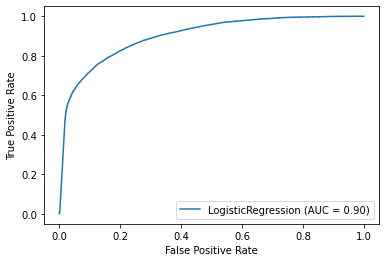

In [117]:
plot_roc_curve(lr,X_train[f_col],y_train)

Without hyparameter tuning we r 81 accuracy,recall and precison
### lets do some hyper paramter tuning 

In [118]:
# defineing model
model=LogisticRegression()
# deifning paramter
param={"max_iter":[50,100,200,500,1000],
        "solver": ['newton-cg', 'lbfgs', 'liblinear'],
       "penalty":["l2"],
       "C":[100, 10, 1.0, 0.1, 0.01]}

# definig folds
folds=KFold(n_splits=5, shuffle=True, random_state=100)


cv_logr = GridSearchCV(estimator=model,param_grid=param,cv=folds,scoring="roc_auc",return_train_score=True,refit=True,n_jobs=-1,verbose=20)

In [119]:
%%time
cv_logr.fit(X_train[f_col],y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Paralle

Wall time: 2min 30s


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [50, 100, 200, 500, 1000],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=20)

In [120]:
param_f=cv_logr.best_params_
param_f

{'C': 100, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [121]:
cv_logr.best_score_

0.9001162242314177

# Making Final interpetable model 

In [186]:
print("ACCURACY SCORE")
print(" train Data:{}\n test Data: {}".format(accuracy_score(y_train,y_train_pred),\
                                           accuracy_score(y_test,cv_logr.predict(X_test[f_col]))))
print("----------------------------------------------")


print("RECALL/SENSITIVITY SCORE")
print(" train Data:{}\n test Data: {}".format(recall_score(y_train,y_train_pred),\
                                             recall_score(y_test,cv_logr.predict(X_test[f_col]))))
print("----------------------------------------------")



print("precison SCORE")
print(" train Data:{}\n test Data: {}".format(precision_score(y_train,y_train_pred),\
                                             precision_score(y_test,cv_logr.predict(X_test[f_col]))))






print("----------------------------------------------")

ACCURACY SCORE
 train Data:0.8137472786647315
 test Data: 0.8115021770682148
----------------------------------------------
RECALL/SENSITIVITY SCORE
 train Data:0.8106404208998549
 test Data: 0.8078737300435413
----------------------------------------------
precison SCORE
 train Data:0.8157090046095569
 test Data: 0.8137792397660819
----------------------------------------------


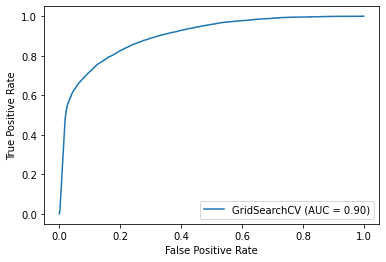

In [123]:
plot_roc_curve(cv_logr,X_train[f_col],y_train)

We cannot see much difference after hyper parameter tuning We can choose any of the model lr or cv_logr <br>
### here we will we will go with lr with default paramter

In [124]:
coef

,columns,value
0,intercept,-0.460278
0,total_ic_mou_8,-1.487248
1,max_rech_data_8,0.339074
2,sachet_2g_8,-0.747802
3,monthly_2g_6_2,-1.243736
4,monthly_2g_7_1,-1.275095
5,monthly_2g_7_2,-2.832654
6,monthly_2g_8_1,-2.888970
7,monthly_2g_8_2,-3.601873
8,monthly_3g_7_3,-1.784670


### Conclusion
we can see max_rech_data_8 and monthly_recharge_2g and monthly_recharge_3g can be good preditcor


# Non Interpetable model

 with the help of pca we can reduce dimension <br>
 
 With high dimension we can overfit model which will give good result in training but will fail in unseen data

In [125]:
# intiializing pca
pca=PCA(random_state=100)

In [126]:
pca.fit(X_train)

PCA(random_state=100)

In [127]:
pca.components_

array([[ 7.79394289e-02,  1.01798475e-01,  1.02314261e-01, ...,
        -3.50390584e-06,  3.04024692e-06,  1.40962414e-06],
       [-3.14337863e-02,  1.61006284e-02,  7.90518895e-02, ...,
         1.85368939e-05,  2.18212457e-05,  4.60970975e-06],
       [-4.29099447e-02,  8.01359775e-02,  1.10474396e-01, ...,
         2.97376134e-05,  1.73113673e-05,  2.11657049e-05],
       ...,
       [ 1.38484383e-05,  8.00505376e-05, -8.78781998e-05, ...,
         4.61082527e-01,  1.39432787e-02, -1.59239904e-02],
       [-0.00000000e+00,  2.76343564e-19,  4.48629976e-19, ...,
         2.84286570e-17, -1.02035829e-16,  7.14682693e-03],
       [-0.00000000e+00,  1.60426902e-18,  7.76623815e-20, ...,
         6.62092220e-17,  3.65534022e-17,  7.07070663e-01]])

In [128]:
pca.explained_variance_ratio_

array([1.89865639e-01, 1.60132798e-01, 6.06027070e-02, 4.74398045e-02,
       4.44476968e-02, 3.01927107e-02, 2.57509932e-02, 2.39241165e-02,
       2.05509234e-02, 1.87461802e-02, 1.64805014e-02, 1.61980443e-02,
       1.36589094e-02, 1.27508979e-02, 1.19458209e-02, 1.15946786e-02,
       1.11543695e-02, 1.02940682e-02, 9.79416190e-03, 9.71267951e-03,
       9.13859328e-03, 8.45371591e-03, 8.25085443e-03, 7.73614172e-03,
       7.25829057e-03, 6.91170574e-03, 6.84630507e-03, 6.56602454e-03,
       6.33957844e-03, 6.03899665e-03, 5.84211189e-03, 5.71722291e-03,
       5.60338637e-03, 5.18722178e-03, 4.93472868e-03, 4.90455256e-03,
       4.72092891e-03, 4.45002032e-03, 4.39687122e-03, 4.20589703e-03,
       4.12587340e-03, 3.98422045e-03, 3.89709971e-03, 3.74856868e-03,
       3.64229186e-03, 3.53902858e-03, 3.49960915e-03, 3.42372222e-03,
       3.34574891e-03, 3.31207497e-03, 3.25318574e-03, 3.18811695e-03,
       3.15839301e-03, 3.02452060e-03, 2.98768696e-03, 2.78063940e-03,
      

In [129]:
# Making scree plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

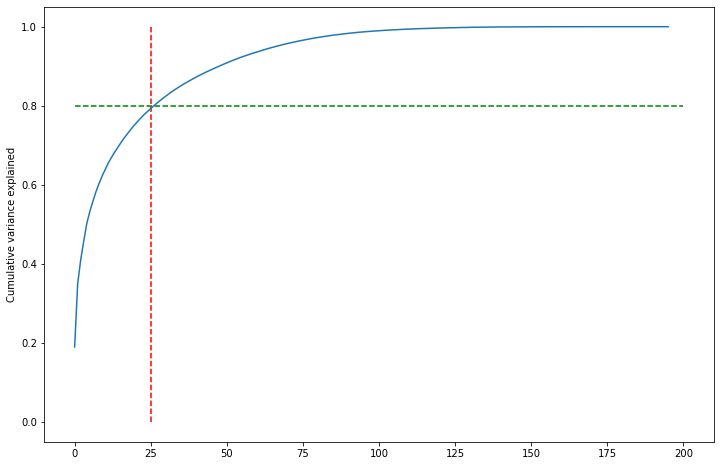

In [131]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.80, xmax=200, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### We can see 80 % variance can be achieved with the help of 25 features only 
which can be significantly low as compare to 200 col

In [133]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [134]:
X_train_pca = pca_final.fit_transform(X_train)

In [135]:
X_train_pca.shape

(44096, 25)

In [136]:
corrmat = np.corrcoef(X_train_pca.transpose())

<AxesSubplot:>

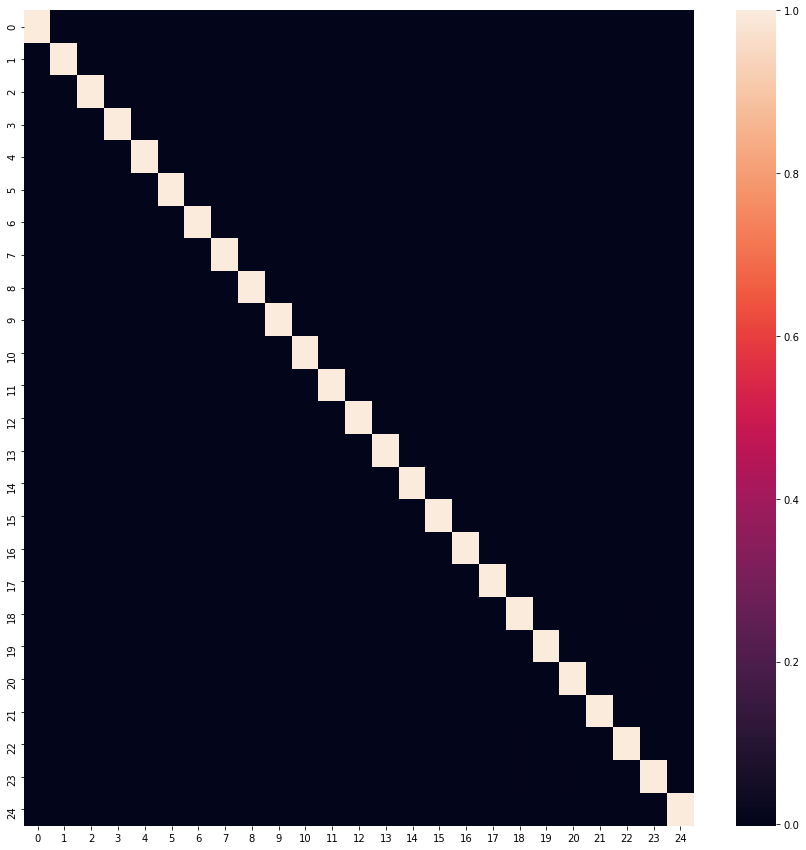

In [137]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat,)

we can see there is no multicolineraity 

# Model Building

now we will make some advance model <br>
RandomForest with hyperparameter tuning <br>
XG boost with hyperparameter tuning <br>
adaboost with hyperparameter tuning <br>

# Model 1 : Random Forest

In [141]:
##
rf= RandomForestClassifier()


param={
    "max_depth":[2,3,5,8,10,12],
    "min_samples_split":[2,3,4,6,8],
    "n_estimators":[50,80,100,150],
    "max_samples":[50,100,200,500,1000],
    "max_features":[3,7,10,15,25,],
    
    
}

In [142]:
folds

KFold(n_splits=5, random_state=100, shuffle=True)

In [143]:
cv_rf= GridSearchCV(estimator=rf,param_grid=param,cv=folds,scoring="roc_auc",return_train_score=True,refit=True,n_jobs=-1,verbose=1)

In [144]:
cv_rf.fit(X_train_pca,y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 57.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 68.5min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 81.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 97.6min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10, 12],
                         'max_features': [3, 7, 10, 15, 25],
                         'max_samples': [50, 100, 200, 500, 1000],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [50, 80, 100, 150]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [145]:
result_rf=pd.DataFrame(cv_rf.cv_results_)

In [146]:
result_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.684809,0.018303,0.078122,0.000002,2,3,50,2,50,"{'max_depth': 2, 'max_features': 3, 'max_samples': 50, 'min_samples_split': 2, 'n_estimators': 50}",0.880847,0.871993,0.874070,0.865502,0.878969,0.874276,0.005430,2804,0.877429,0.877402,0.883277,0.856150,0.881092,0.875070,0.009722
1,1.053051,0.012500,0.124991,0.009881,2,3,50,2,80,"{'max_depth': 2, 'max_features': 3, 'max_samples': 50, 'min_samples_split': 2, 'n_estimators': 80}",0.898551,0.888149,0.876807,0.877834,0.892624,0.886793,0.008415,2415,0.892494,0.895147,0.880303,0.871762,0.897828,0.887507,0.009895
2,1.324891,0.035650,0.161442,0.004814,2,3,50,2,100,"{'max_depth': 2, 'max_features': 3, 'max_samples': 50, 'min_samples_split': 2, 'n_estimators': 100}",0.901696,0.886039,0.893523,0.889014,0.899084,0.893871,0.005890,2004,0.898946,0.891509,0.897156,0.887259,0.899772,0.894928,0.004797
3,1.818238,0.092915,0.245059,0.017995,2,3,50,2,150,"{'max_depth': 2, 'max_features': 3, 'max_samples': 50, 'min_samples_split': 2, 'n_estimators': 150}",0.908224,0.894400,0.902526,0.891558,0.902048,0.899751,0.006009,1655,0.902556,0.901412,0.904531,0.890034,0.901669,0.900040,0.005122
4,0.761564,0.064338,0.122929,0.029559,2,3,50,3,50,"{'max_depth': 2, 'max_features': 3, 'max_samples': 50, 'min_samples_split': 3, 'n_estimators': 50}",0.875376,0.873030,0.879352,0.884226,0.895340,0.881465,0.007910,2673,0.868737,0.876455,0.879483,0.884834,0.892891,0.880480,0.008101


In [147]:
cv_rf.best_params_

{'max_depth': 12,
 'max_features': 3,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 150}

In [148]:
cv_rf.best_score_

0.9418470701012301

In [149]:
# predicting on test dataset score

In [150]:
X_test_pca=pca_final.transform(X_test)

In [151]:
X_test_pca.shape

(11024, 25)

In [152]:
# y prediction

y_train_pred_rf=cv_rf.predict(X_train_pca)

In [185]:
eval_(cv_rf,y_train,y_train_pred_rf)

ACCURACY SCORE


ValueError: Number of features of the model must match the input. Model n_features is 25 and input n_features is 13 

In [153]:
print("ACCURACY SCORE")
print(" train Data:{}\n test Data: {}".format(accuracy_score(y_train,y_train_pred_rf),\
                                           accuracy_score(y_test,cv_rf.predict(X_test_pca))))
print("----------------------------------------------")


print("RECALL/SENSITIVITY SCORE")
print(" train Data:{}\n test Data: {}".format(recall_score(y_train,y_train_pred_rf),\
                                             recall_score(y_test,cv_rf.predict(X_test_pca))))
print("----------------------------------------------")



print("precison SCORE")
print(" train Data:{}\n test Data: {}".format(precision_score(y_train,y_train_pred_rf),\
                                             precision_score(y_test,cv_rf.predict(X_test_pca))))


 



print("----------------------------------------------")




ACCURACY SCORE
 train Data:0.8758844339622641
 test Data: 0.8642960812772134
----------------------------------------------
RECALL/SENSITIVITY SCORE
 train Data:0.8476052249637155
 test Data: 0.8316400580551524
----------------------------------------------
precison SCORE
 train Data:0.8984183452718619
 test Data: 0.889751552795031
----------------------------------------------


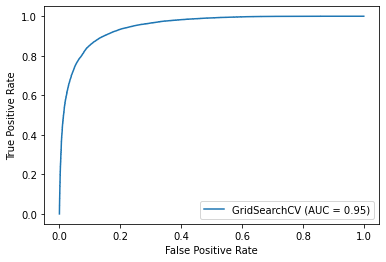

In [154]:
plot_roc_curve(cv_rf,X_train_pca,y_train)

If we compare this with logistic regression 
We r getting very high score in terms of accuracy,sensitivity and precison


there is no so much difference in train score and test score we can see that our model is not overfitting

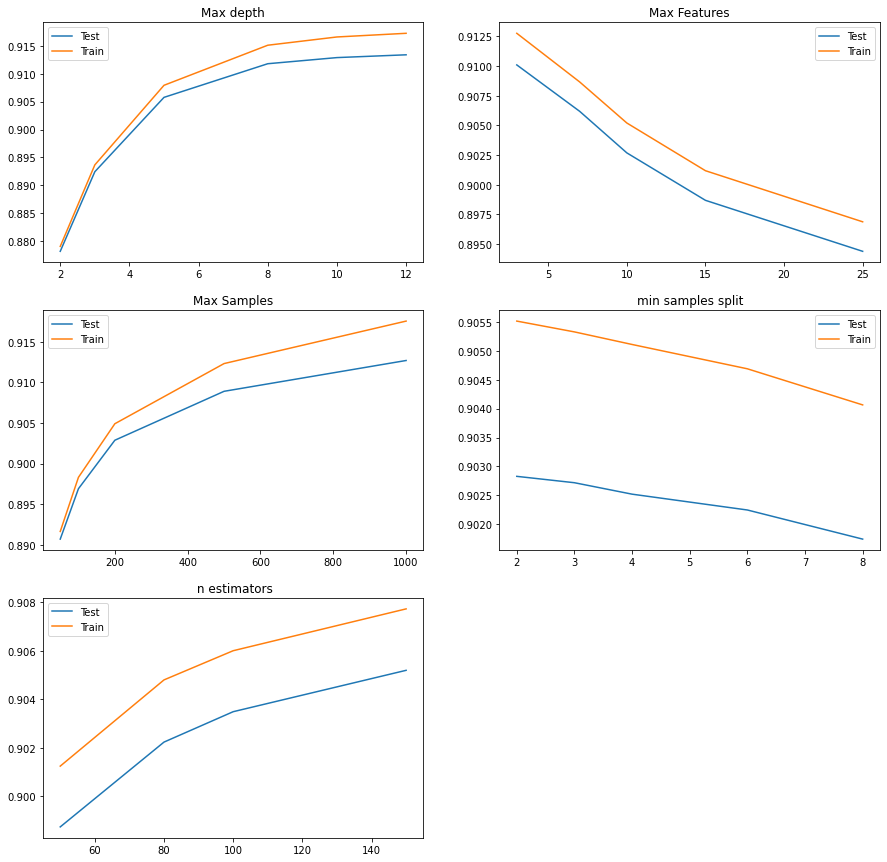

In [155]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(result_rf.groupby(result_rf["param_max_depth"])["mean_test_score"].mean(),label="Test")
plt.plot(result_rf.groupby(result_rf["param_max_depth"])["mean_train_score"].mean(),label="Train")
plt.title("Max depth")
plt.legend()

plt.subplot(3,2,2)
plt.plot(result_rf.groupby(result_rf["param_max_features"])["mean_test_score"].mean(),label="Test")
plt.plot(result_rf.groupby(result_rf["param_max_features"])["mean_train_score"].mean(),label="Train")
plt.title("Max Features")
plt.legend()


plt.subplot(3,2,3)
plt.plot(result_rf.groupby(result_rf["param_max_samples"])["mean_test_score"].mean(),label="Test")
plt.plot(result_rf.groupby(result_rf["param_max_samples"])["mean_train_score"].mean(),label="Train")
plt.title("Max Samples")
plt.legend()

         
         
plt.subplot(3,2,4)
plt.plot(result_rf.groupby(result_rf["param_min_samples_split"])["mean_test_score"].mean(),label="Test")
plt.plot(result_rf.groupby(result_rf["param_min_samples_split"])["mean_train_score"].mean(),label="Train")
plt.title("min samples split")
plt.legend()

plt.subplot(3,2,5)
plt.plot(result_rf.groupby(result_rf["param_n_estimators"])["mean_test_score"].mean(),label="Test")
plt.plot(result_rf.groupby(result_rf["param_n_estimators"])["mean_train_score"].mean(),label="Train")
plt.title(" n estimators")
plt.legend()

plt.show()

We can see that 
dpeth of trees,max number of samples,numbers of estimators  increases it leads to overfitting <br>
more number of features leads to decrease in score <br>

# Model 2 : XGB Classifier


In [156]:
xgb= XGBClassifier()

In [159]:
param_xgb={
    "max_depth":[3,5,8,10],
    "n_estimators":[50,100,200],
    "learning_rate":[0.1,0.3,0.5,0.8]    
}

In [160]:
cv_xgb= GridSearchCV(estimator=xgb,param_grid=param_xgb,cv=folds,scoring="roc_auc",return_train_score=True ,refit=True,n_jobs=-1,verbose=5)

In [161]:
cv_xgb.fit(X_train_pca,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 60.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mon...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                          

In [162]:
result_xgb=pd.DataFrame(cv_xgb.cv_results_)

In [163]:
result_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.225905,2.018276,0.056069,0.013689,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.928691,0.919950,0.922896,0.924301,0.925669,0.924301,0.002900,48,0.928903,0.930644,0.930338,0.930214,0.930022,0.930024,0.000596
1,22.184698,0.609174,0.076783,0.008652,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",0.943501,0.935725,0.937695,0.938196,0.940205,0.939064,0.002637,47,0.945535,0.947457,0.947027,0.946687,0.946530,0.946647,0.000641
2,43.698278,1.135076,0.120733,0.001719,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}",0.953133,0.947572,0.948142,0.947734,0.950055,0.949327,0.002100,42,0.958183,0.960003,0.958708,0.958593,0.959032,0.958904,0.000613
3,17.896534,0.337135,0.065763,0.000400,0.1,5,50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}",0.950696,0.944492,0.945649,0.946873,0.948935,0.947329,0.002236,44,0.958639,0.959379,0.959070,0.959936,0.959258,0.959257,0.000423
4,36.611408,0.372824,0.124329,0.021159,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}",0.961582,0.957662,0.958011,0.957606,0.959856,0.958944,0.001555,38,0.972118,0.973400,0.972275,0.972743,0.972485,0.972604,0.000450


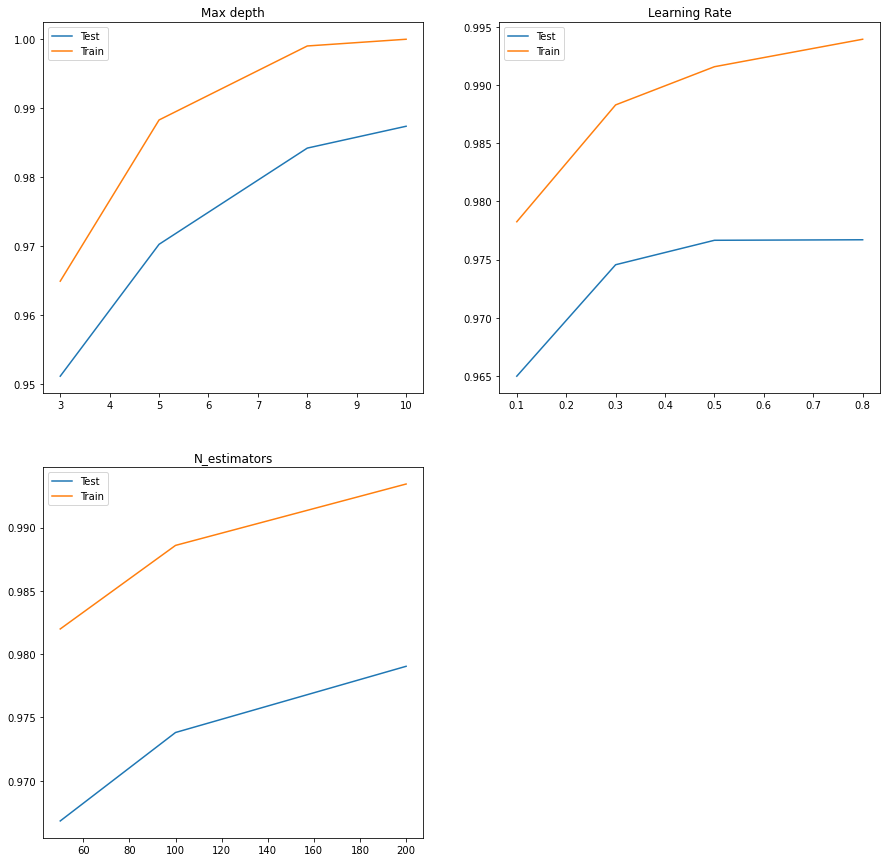

In [164]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(result_xgb.groupby(result_xgb["param_max_depth"])["mean_test_score"].mean(),label="Test")
plt.plot(result_xgb.groupby(result_xgb["param_max_depth"])["mean_train_score"].mean(),label="Train")
plt.legend()
plt.title("Max depth")

plt.subplot(2,2,2)
plt.plot(result_xgb.groupby(result_xgb["param_learning_rate"])["mean_test_score"].mean(),label="Test")
plt.plot(result_xgb.groupby(result_xgb["param_learning_rate"])["mean_train_score"].mean(),label="Train")
plt.legend()
plt.title("Learning Rate")


plt.subplot(2,2,3)
plt.plot(result_xgb.groupby(result_xgb["param_n_estimators"])["mean_test_score"].mean(),label="Test")
plt.plot(result_xgb.groupby(result_xgb["param_n_estimators"])["mean_train_score"].mean(),label="Train")
plt.legend()
plt.title("N_estimators")
plt.show()

for learning rate we can see as learning rate increase model start overfitting

In [165]:
cv_xgb.best_params_

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200}

In [166]:

y_train_pred_xgb=cv_xgb.predict(X_train_pca)

In [167]:

print("ACCURACY SCORE")
print(" train Data:{}\n test Data: {}".format(accuracy_score(y_train,y_train_pred_xgb),\
                                           accuracy_score(y_test,cv_xgb.predict(X_test_pca))))
print("----------------------------------------------")


print("RECALL/SENSITIVITY SCORE")
print(" train Data:{}\n test Data: {}".format(recall_score(y_train,y_train_pred_xgb),\
                                             recall_score(y_test,cv_xgb.predict(X_test_pca))))
print("----------------------------------------------")



print("precison SCORE")
print(" train Data:{}\n test Data: {}".format(precision_score(y_train,y_train_pred_xgb),\
                                             precision_score(y_test,cv_xgb.predict(X_test_pca))))






print("----------------------------------------------")


ACCURACY SCORE
 train Data:1.0
 test Data: 0.9645319303338171
----------------------------------------------
RECALL/SENSITIVITY SCORE
 train Data:1.0
 test Data: 0.9871190130624092
----------------------------------------------
precison SCORE
 train Data:1.0
 test Data: 0.9444540878319736
----------------------------------------------


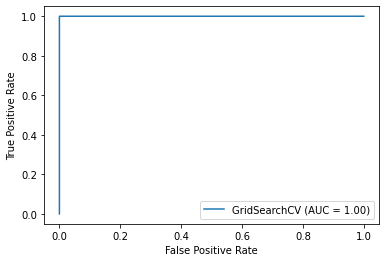

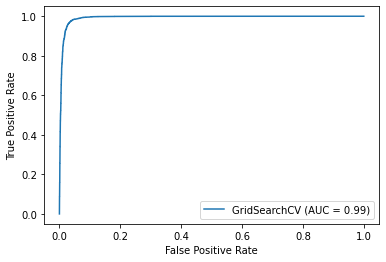

In [169]:
plot_roc_curve(cv_xgb,X_train_pca,y_train)
plot_roc_curve(cv_xgb,X_test_pca,y_test)


We can see that we r getting 100 percent accuracy in train test and we r getting 97 percent in test which very high, but we cannot say this is case of overfitiing as there is not much drop in test score same for recall/sensisitvity  but in case of precison we can see we r getting 100 percenst score in train in 95 in test score we can see drop here 



# Model Bulid 3: Ada Boost

In [170]:
ada=AdaBoostClassifier()

In [171]:
param_ada={
    "base_estimator":[DecisionTreeClassifier(max_depth=1),LogisticRegression()],
    "learning_rate":[0.1,0.3,0.5,1]
    
    
    
    
}

In [172]:
cv_ada= GridSearchCV(estimator=xgb,param_grid=param_ada,cv=folds,scoring="roc_auc",return_train_score=True,refit=True,n_jobs=-1,verbose=5)

In [173]:
cv_ada.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.5min finished


[18:05:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { base_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mon...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
             

In [174]:
result_ada=pd.DataFrame(cv_ada.cv_results_)

In [175]:
result_ada.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,53.599234,0.580114,0.177988,0.012026,DecisionTreeClassifier(max_depth=1),0.1,"{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.1}",0.969405,0.965537,0.966151,0.965804,0.967686,0.966916,0.001450,7,0.983062,0.984040,0.983303,0.983080,0.983188,0.983335,0.000363
1,51.600355,0.300044,0.162813,0.008303,DecisionTreeClassifier(max_depth=1),0.3,"{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.3}",0.980870,0.978739,0.978712,0.978532,0.980481,0.979467,0.000997,5,0.997521,0.997923,0.997760,0.996720,0.997654,0.997516,0.000419
2,51.562299,0.366968,0.184826,0.018452,DecisionTreeClassifier(max_depth=1),0.5,"{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.5}",0.983079,0.980057,0.981831,0.981909,0.982043,0.981784,0.000974,1,0.999931,0.999886,0.999846,0.999897,0.999841,0.999880,0.000034
3,51.491532,0.274586,0.169591,0.014952,DecisionTreeClassifier(max_depth=1),1,"{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1}",0.982928,0.979806,0.980380,0.980914,0.982992,0.981404,0.001318,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,52.384038,0.208660,0.172896,0.011191,LogisticRegression(),0.1,"{'base_estimator': LogisticRegression(), 'learning_rate': 0.1}",0.969405,0.965537,0.966151,0.965804,0.967686,0.966916,0.001450,7,0.983062,0.984040,0.983303,0.983080,0.983188,0.983335,0.000363


Text(0.5, 1.0, 'Learning Rate')

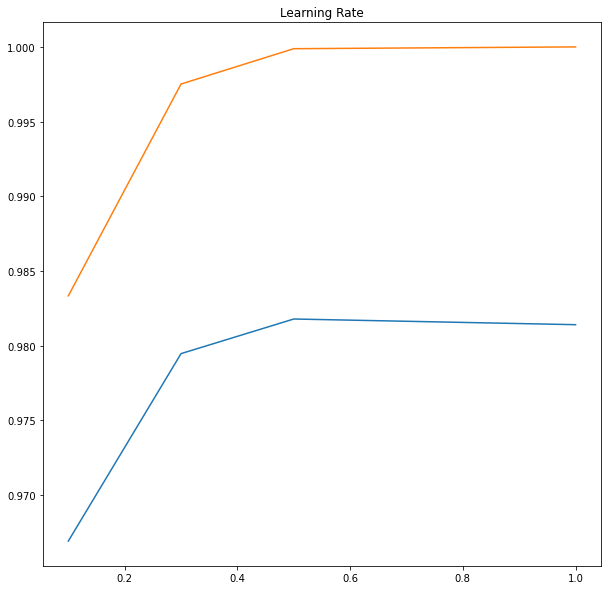

In [176]:
plt.figure(figsize=(10,10))
plt.plot(result_ada.groupby(result_ada["param_learning_rate"])["mean_test_score"].mean(),label="Test")
plt.plot(result_ada.groupby(result_ada["param_learning_rate"])["mean_train_score"].mean(),label="Train")
plt.title("Learning Rate")
plt.legend()



As learning rate incerase score increase but after certain learning rate it start dropping

In [177]:
cv_ada.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.5}

In [178]:

y_train_pred_ada=cv_ada.predict(X_train_pca)

In [179]:

print("ACCURACY SCORE")
print(" train Data:{}\n test Data: {}".format(accuracy_score(y_train,y_train_pred_ada),\
                                           accuracy_score(y_test,cv_ada.predict(X_test_pca))))
print("----------------------------------------------")


print("RECALL/SENSITIVITY SCORE")
print(" train Data:{}\n test Data: {}".format(recall_score(y_train,y_train_pred_ada),\
                                             recall_score(y_test,cv_ada.predict(X_test_pca))))
print("----------------------------------------------")



print("precison SCORE")
print(" train Data:{}\n test Data: {}".format(precision_score(y_train,y_train_pred_ada),\
                                             precision_score(y_test,cv_ada.predict(X_test_pca))))






print("----------------------------------------------")

ACCURACY SCORE
 train Data:0.9933100507982583
 test Data: 0.9455732946298984
----------------------------------------------
RECALL/SENSITIVITY SCORE
 train Data:0.9979136429608128
 test Data: 0.9619013062409288
----------------------------------------------
precison SCORE
 train Data:0.9888094917082378
 test Data: 0.9314827828531272
----------------------------------------------


adaboost is doing quite good job we getting 99 accuracy on train and 96 on test data and recall score also good train score 99 and test score 98 but not in precison score 

# Selecting Best Model 



In [180]:
# we will see standerd deviation of best param model 

result_rf[result_rf["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2583,2.501175,0.039055,0.356633,0.012805,12,3,1000,2,150,"{'max_depth': 12, 'max_features': 3, 'max_samples': 1000, 'min_samples_split': 2, 'n_estimators': 150}",0.94607,0.938507,0.942455,0.941347,0.940855,0.941847,0.002474,1,0.9504,0.952301,0.951579,0.950392,0.95036,0.951006,0.000796


In [181]:
result_xgb[result_xgb["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,145.451915,0.678273,0.5468,0.022707,0.3,10,200,"{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200}",0.991569,0.988454,0.990345,0.989533,0.990196,0.990019,0.001022,1,1.0,1.0,1.0,1.0,1.0,1.0,7.021667e-17


In [182]:
result_ada[result_ada["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,51.562299,0.366968,0.184826,0.018452,DecisionTreeClassifier(max_depth=1),0.5,"{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.5}",0.983079,0.980057,0.981831,0.981909,0.982043,0.981784,0.000974,1,0.999931,0.999886,0.999846,0.999897,0.999841,0.99988,0.000034
6,52.033481,0.491305,0.182220,0.016279,LogisticRegression(),0.5,"{'base_estimator': LogisticRegression(), 'learning_rate': 0.5}",0.983079,0.980057,0.981831,0.981909,0.982043,0.981784,0.000974,1,0.999931,0.999886,0.999846,0.999897,0.999841,0.99988,0.000034


If we see standerd deviation score of Random forest model, xgboost, adaboost  <br>
**Random forest have higher then adaboost and least in xgboost so we can say that xgboost is more trustable**
<br>

If We consider Time to fit here we can see that
**Xgboost have higher standerd deviation  and then adaboost and less in Random forest
Which means Xgboost have worst performance in terms of training model.**

In terms of Business We r targeting High recall or sensitivity we want to our model classify churned customer more keeping in mind accuracy and precision here we can see that **Xgb performed best** <br>
We don't found enough evidence to say that xgbmodel is overfitting as test error is not so much differ from train, overall in acceptance range

## We have decided to Finalize cv_xgb 

In overall we can see that even after dimensionality reduction technique with  80 % variance  we can able to make far better model. <br>
but it come with losing interpetbility 

## Recommendation for company :-

#### (With the help of Interpetable model)
features like maximum data recharge done by user is more chances then churning of customer is less <br>
Incoming call in number is decreaed then user going to churn <br>
3g,sachet 2g recharge are good predictor<br>


## How our model can help company to find who is churning ?

we can see that our cv_xgb model to able to get 99% sensitivity with standard deviation 0.00055, sensitivity means how good our<br> model able to predict customer who r going to churn <br>
It means our model is trustable as its standard deviation is low <br>

## how company can stop customer from churning ?

> - Company can provide different offer to them <br>
>> - Offer should be specific: If company found that previously user was using data and stop doing that they should provide offer in terms of data like rolling out data package with more data volumne.
>> - If user was using sim for call purpose they can rollout offer like low tarrif pacakge.





> - Company sales team can call them and ask them what Problem they are facing <br>
> - There are problem like non avaialblity of network, internet speed issue, which can be cause of decrease in usage and end up in churning  <br>
> - If company is seeing more churn in specific area even after rolling out offers and all, then company can look at any problems registerd by users, they should send investigation officier to do investigate and make decision

